# **Website of The Grocery Store Chain**
___________________________


### **Experimentation and A/B Testing Project**
- You are an analyst for a large grocery chain.
- One of your company’s goals is to drive more customers to download our mobile app and register for the loyalty program.
- Your manager is curious if changing the link to a button of the app store will improve the user’s ability to download the app.
- Your manager asks you to create an A/B testing plan for changing the link to a button of the app store with the expectation it will the user’s interest to download the app.

### **Data Quality**

#### Import Data

First, we must import the data.
- Grocery website is stord in `.csv` named `grocerywebsiteabtestdata.csv`
- Import data into python with `pd.read_csv(...)` to start analysis

In [1]:
#load data
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt

#stats
from scipy import stats

In [2]:
#initialization filename
filename = "grocerywebsiteabtestdata.csv"

#import data
data = pd.read_csv(filename)

#display 10 top rows of the data
data.head(10)

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0
5,6,23.5.199.2,1,3,0
6,7,195.12.126.2,1,1,0
7,8,97.6.126.6,0,3,1
8,9,93.10.165.4,1,1,0
9,10,180.3.76.4,1,1,0


- There are 5 column (`RecordID`, `IP Address`, `LoggedInFlag`, `ServerID`, `VisitPageFlag`)
- `RecordID` : identifier of the row of data
- `IP Address` : address of the user, who is visiting website
- `LoggedInFlag` : 1 - when user has an account and logged in
- `ServerID` : one of the servers user was routed through
- `VisitPageFlag` : 1 - when user clicked on the loyalty program page

In [3]:
#overview data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184588 entries, 0 to 184587
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       184588 non-null  int64 
 1   IP Address     184588 non-null  object
 2   LoggedInFlag   184588 non-null  int64 
 3   ServerID       184588 non-null  int64 
 4   VisitPageFlag  184588 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 7.0+ MB


In [4]:
#dimension of data
data.shape

(184588, 5)

In [5]:
data.describe()

,RecordID,LoggedInFlag,ServerID,VisitPageFlag
count,184588.000000,184588.000000,184588.000000,184588.000000
mean,92294.500000,0.503657,1.999691,0.058184
std,53286.110082,0.499988,0.816719,0.234091
min,1.000000,0.000000,1.000000,0.000000
25%,46147.750000,0.000000,1.000000,0.000000
50%,92294.500000,1.000000,2.000000,0.000000
75%,138441.250000,1.000000,3.000000,0.000000
max,184588.000000,1.000000,3.000000,1.000000


#### Missing Value

In [6]:
#checking missing value
data.isna().sum()

RecordID         0
IP Address       0
LoggedInFlag     0
ServerID         0
VisitPageFlag    0
dtype: int64

- There is no missing value.

#### Uniqueness

An IP Address may have visited the page more than once. So, we must to check duplicate data on IP Address.

In [7]:
#checking duplicate data 
data.duplicated(['IP Address']).sum()

85072

In [8]:
#droping duplicates data
data.drop_duplicates(subset='IP Address', inplace=True)
data.shape

(99516, 5)

- Now, we have 99516 total records with no duplicates and data ready for analysis.

In [9]:
#display 10 top rows of the data
data.head(10)

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0
5,6,23.5.199.2,1,3,0
6,7,195.12.126.2,1,1,0
7,8,97.6.126.6,0,3,1
8,9,93.10.165.4,1,1,0
9,10,180.3.76.4,1,1,0


#### Distribution of Data

Split the dataset into `Control` and `Treatment` groups.

In [10]:
#length of ServerID when value 1
len(data[data['ServerID']==1])

33229

In [11]:
#length of ServerID when value 2
len(data[data['ServerID']==2])

33105

In [12]:
#length of ServerID when value 3
len(data[data['ServerID']==3])

33182

In [13]:
#compare each ServerID with VisitPageFlag
serverID_with_visitPage = pd.crosstab(data["ServerID"], data['VisitPageFlag'])
serverID_with_visitPage

VisitPageFlag,0,1
ServerID,,
1,30938,2291
2,31359,1746
3,31461,1721


We will set ServerID = 1 as `Treatment` Group and ServerID = 2 and 3 as `Control` Group

In [14]:
data['Group'] = np.where(data['ServerID'] == 1, 'Treatment', 'Control')
data.head()

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag,Group
0,1,39.13.114.2,1,2,0,Control
1,2,13.3.25.8,1,1,0,Treatment
2,3,247.8.211.8,1,1,0,Treatment
3,4,124.8.220.3,0,3,0,Control
4,5,60.10.192.7,0,2,0,Control


In [15]:
#length of Control Group
n_control = len(data[data['Group']=='Control'])
n_control

66287

In [16]:
#length of Treatment Group
n_treatment = len(data[data['Group']=='Treatment'])
n_treatment

33229

*Calculate of sample size = 
n = 16(0.5)2 / 0.022  = 10.000 users in each variant*

From calculating of sample size, we get 10.000 users in each variant. So we can sample using Simple Random Sampling in this dataset.

In [17]:
#initialization the number of sample
n = 10_000

In [18]:
#choose sample on control
sample_data_control = data[data['Group']=='Control'].sample(n = n,
                                                              replace = False)
#show sample on control
sample_data_control

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag,Group
20465,20466,109.9.233.9,1,3,0,Control
128191,128192,19.10.120.4,1,2,0,Control
1022,1023,254.1.172.4,0,3,0,Control
99161,99162,214.13.250.8,0,2,0,Control
28765,28766,81.15.243.6,1,2,0,Control
...,...,...,...,...,...,...
143953,143954,217.9.122.3,1,2,0,Control
24741,24742,16.16.179.2,0,2,0,Control
55141,55142,150.9.108.7,0,2,0,Control
17077,17078,10.12.146.9,1,2,0,Control


In [19]:
#choose sample on treatment
sample_data_treatment = data[data['Group']=='Treatment'].sample(n = n,
                                                              replace = False)
#show sample on treatment
sample_data_treatment

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag,Group
125082,125083,83.5.181.6,0,1,1,Treatment
167063,167064,147.0.161.8,0,1,0,Treatment
87565,87566,134.0.112.5,1,1,0,Treatment
140719,140720,38.3.237.5,1,1,0,Treatment
75321,75322,165.4.84.4,0,1,1,Treatment
...,...,...,...,...,...,...
24019,24020,208.16.198.6,1,1,0,Treatment
119602,119603,82.11.205.9,0,1,0,Treatment
32568,32569,126.15.64.7,0,1,0,Treatment
113858,113859,254.12.206.4,1,1,0,Treatment


Calculate Click-Through-Rate

<center>

|Group|#User|#Count Clicked|CTR
|:--|:--:|:--:|:--:|
|Control|10.000|-|-|
|Treatment|10.000|-|-|

</center>

In [20]:
#find control group that is CTR
data_control_ctr = sample_data_control[(sample_data_control['VisitPageFlag'] == 1)]

#length of CTR on control group
n_control_ctr = len(data_control_ctr)
n_control_ctr

513

In [21]:
#find treatment group that is CTR
data_treatment_ctr = sample_data_treatment[(sample_data_treatment['VisitPageFlag'] == 1)]

#length of CTR on treatment group
n_treatment_ctr = len(data_treatment_ctr)
n_treatment_ctr

691

In [22]:
#merge sample data control and treatment
data_sample = pd.concat([sample_data_control, sample_data_treatment], ignore_index=True)

#comparing the Control and Treatment Group on VisitPageFlag
group_with_visitPage = pd.crosstab(data_sample['Group'], data_sample['VisitPageFlag'], margins=True)
group_with_visitPage

VisitPageFlag,0,1,All
Group,,,
Control,9487,513,10000
Treatment,9309,691,10000
All,18796,1204,20000


Text(0, 0.5, 'Frequency')

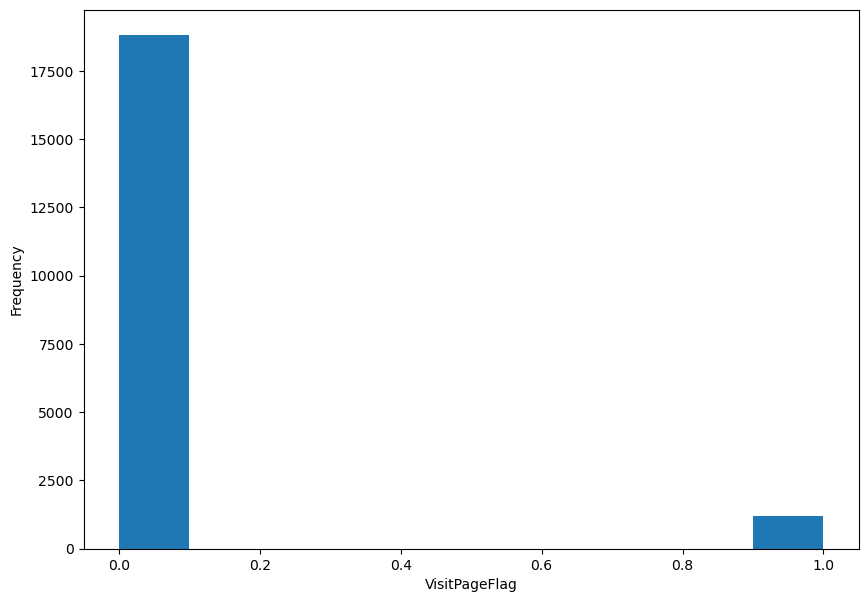

In [23]:
#Make histogram on data_sample
#bins = 10
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data_sample['VisitPageFlag'],bins=10)
 
# Show plot
plt.xlabel('VisitPageFlag')
plt.ylabel('Frequency')

Finally, calculate CTR on each group

In [24]:
#CTR control group
ctr_control = n_control_ctr / n
ctr_control

0.0513

In [25]:
#CTR treatment group
ctr_treatment = n_treatment_ctr / n
ctr_treatment

0.0691

<center>

|Group|#User|#Count Clicked|CTR
|:--|:--:|:--:|:--:|
|Control|10.000|513|0.0513|
|Treatment|10.000|691|0.0691|

</center>

On Visualization

C:\Users\UYUN\AppData\Local\Temp\ipykernel_13972\3857991313.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=["Control", "Treatment"], fontsize=14)


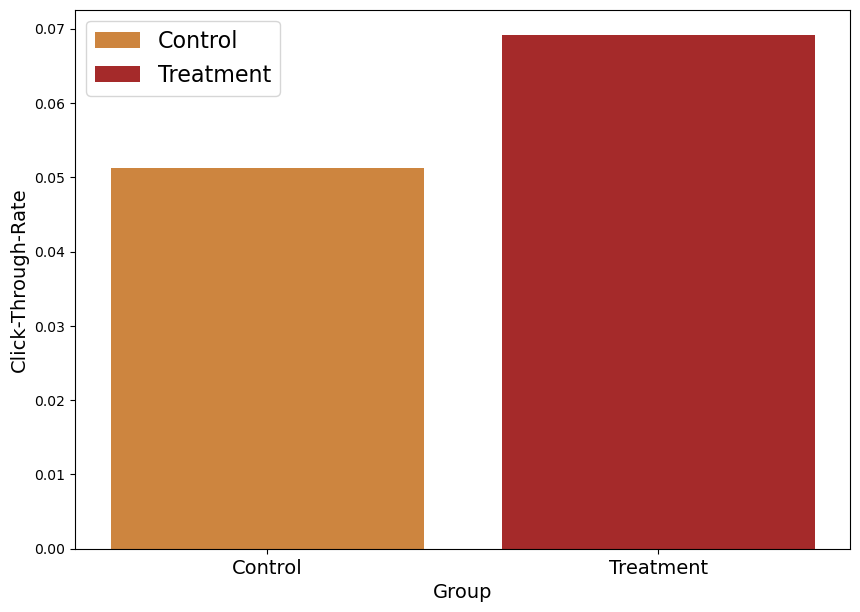

In [26]:
#compare visualization CTR each variant
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

#make plot
ax.bar("Control", ctr_control, color="peru", label="Control")
ax.bar("Treatment", ctr_treatment, color="brown", label="Treatment")

#styling plot
ax.set_ylabel("Click-Through-Rate", fontsize=14)
ax.set_xlabel("Group", fontsize=14)
ax.set_xticklabels(labels=["Control", "Treatment"], fontsize=14)
ax.legend(fontsize=16)
plt.show()

#### Sample Ratio Mismatch (SRM)

We will detect the SRM using chi-square test

*Pre-Analysis*

- Before doing the chi-square test, let's fill in the following table to make it easier to detect the presence of SRM.

<center>

|Group|#User|#Count Clicked|CTR|Percentage|
|:--|:--:|:--:|:--:|:--:|
|Control|10.000|513|0.0513|-|
|Treatment|10.000|691|0.0691|-|

</center>

* Percentage is the percentage of sample size in each group

In [27]:
# Number of users in the control group
n_control = sample_data_control.shape[0]

n_control

10000

In [28]:
# Number of users in the treatment group
n_treatment = sample_data_treatment.shape[0]

n_treatment

10000

In [29]:
# Percentage in each group
n_total = data_sample.shape[0]
persen_control = n_control/n_total * 100
persen_treat = n_treatment/n_total * 100

print(f"% control   : {persen_control:.2f}%")
print(f"% treatment : {persen_treat:.2f}%")

% control   : 50.00%
% treatment : 50.00%


- We get
<center>

|Group|#User|#Count Clicked|CTR|Percentage|
|:--|:--:|:--:|:--:|:--:|
|Control|10.000|513|0.0513|50.00%|
|Treatment|10.000|691|0.0691|50.00%|

</center>

#### Chi-Square Test for Detect SRM

The steps for doing a chi-square test in order to detect SRM are:

**1. Define the null and alternative hypothesis ($H_0$ and $H_1$)**

$H_0$  : No SRM detected

$H_1$  : SRM detected

**2. Calculate chi-square statistics**

$$ \chi^2 = \sum \frac{\left ( \text{observed - expected} \right )^2}{\text{expected}} $$

Where :
- Observed: the control and variation traffic volumes (sample size), respectively
- Expected: the expected values for control and treatment — i.e. the total observed divided by 2

Observed is the same as #user in each group.

For calculate expexted in each group, we can use total observed divided by 2

In [30]:
observed = [n_control, n_treatment]
total_traffic= sum(observed)
expected = [ total_traffic/2, total_traffic/2 ]

Then we can calculate the chi-square statistics using the function in the `scipy` library, namely `chisquare` with steps: 

1. import library
    - from scipy.stats import chisquare
2. Use the function `chisquare(f_obs, f_exp=...)`
    - `f_obs`: Observed frequencies in each category (array)
    - `f_exp`: Expected frequencies in each category. By default the categories are assumed to be equally likely.

In [31]:
#calculate chi-square statistics
from scipy.stats import chisquare
chi = chisquare(observed, f_exp=expected)
print(chi)

Power_divergenceResult(statistic=0.0, pvalue=1.0)


**3. Define decision rules**

In making statistical test decisions, we can use:
- Comparison of chi-square statistics with critical value
     -  $\chi^2 > \chi^2_{\alpha,df}$ → reject $H_0$

- Comparison of p-value with alpha
   - pvalue < $\alpha$ → reject $H_0$


To prove the SRM, we use a p-value = 0.05.

degree of freedom (df) is calculated as: 
$$ df = (rows − 1) × (columns − 1) $$ 


In [32]:
# Comparison of chi-square statistics with critical value
# We must calculate the critical first

# critical value is the chi-square value at alpha
alpha = 0.05
df=(2-1)*(2-1)  

import scipy
chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value: {chi_critical:.3f}")

Critical value: 3.841


In [33]:
#Make decisions from chi-square statistics and critical value
if chi[0] > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Fail to reject H0 : No SRM


In [34]:
# Comparison of P-Value with alpha.
if chi[1] < 0.01:
    print('Reject H0 : SRM may be present.')
else:
    print('Fail to reject H0 : No SRM.')

Fail to reject H0 : No SRM.


Based on the detection of SRM, SRM was not detected.

#### Hypothesis testing

- Define null hypothesis ($H_0$) dan alternative hypothesis ($H_1$)

>H0 (Null Hypothesis)       : CTR New link, such as in picture not text ≤ existing link <br> 
H1 (Alternative Hypothesis) : CTR New link, such as in picture not text > existing link

- Conduct statistical test and let's fill let's fill in the following table

<center>

|Z statistics|P-value|Selisih antar CTR
|:--:|:--:|:--:|
|-|-|-|

</center>

- We need to do a statistical test to find out whether the differences obtained are statistically significant.
- Define $z_{\text{crit}}$, $z_{\text{statistics}}$ dan $\text{p-value}$
- To calculate it, we can use the `statsmodel` library

In [35]:
# Import this library to calculate
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

**1. Calculate $z_{\text{statistics}}$ dan p-value**
Use this function
```python
test_stats, p_value = proportions_ztest(count = ...,
                                        nobs = ...,
                                        alternative = ...)
```

- With 
    - `count` is the number of successful observations
    - `nobs` is the total number of observations
    - `alternative` is a form of hypothesis testing. Can be filled with `two-sided`, `smaller`, or `larger`

- Make count convert & total observation

In [36]:
# Buat count convert & total observation
count_convert = [n_treatment_ctr, n_control_ctr]
count_observation = [n_treatment, n_control]

In [37]:
n_treatment

10000

In [38]:
n_control

10000

In [39]:
n_treatment_ctr

691

In [40]:
n_control_ctr

513

- create an `alternative` for this hypothesis test case
- if we want to prove $H_{1}$ is not the same as a value, use `two-sided`
- if $H_{1}$ is greater than a value, use `larger`
- if $H_{1}$ is smaller than a value, use `smaller`
- in this case, we use `larger` because we want to prove $CR_{\text{new}}$ is greater than $CR_{\text{old}}$

In [41]:
#make alternative
alternative_option = "larger"

- calculate

In [42]:
#call function
z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = alternative_option)

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value}")

Z stats : 5.2916
P-value : 6.061722707735026e-08


- Additionally, calculate the difference between the new & old $CR$

In [43]:
ctr_treatment - ctr_control

0.017799999999999996

In [44]:
# addition
# we can calculate the relative effect which shows how much the percentage increase or decrease in the CTR treatment compared to the control
relative_effect_CTR = (ctr_treatment - ctr_control)/ctr_control * 100

print(f"relatife effect = {relative_effect_CTR:.3} %")

relatife effect = 34.7 %


let's fill let's fill in the following table

<center>

|Z statistics|P-value|Selisih antar CTR
|:--:|:--:|:--:|
|5.2916|6.061722707735026e-08|0.01779|

</center>

There is a relative increase of 34.7%

**Summarize the results of statistical tests**

In [45]:
# from p-value
alpha = 0.05        # the confidence level that we set

# make a decision based on p_value and alpha
if p_value < alpha:
    print("Decision : Reject Null Hypothesis")
else:
    print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


In [46]:
# Z critical is the z-value at alpha
z_critical = stats.norm.ppf(1 - alpha)
z_critical

1.6448536269514722

In [47]:
# from z-statistics
# make decision based on z_critical and alpha
if z_stat > z_critical:
    print("Decision : Reject Null Hypothesis")
else:
    print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


**Visualization**

- We try to visualize the results of this statistical test.
- We visualize in the graph the distribution of $z$ values
- Therefore, we have to find the value of $z$ when $\alpha = 0.05$ or $z_{\text{critical}}$
- We use the following library

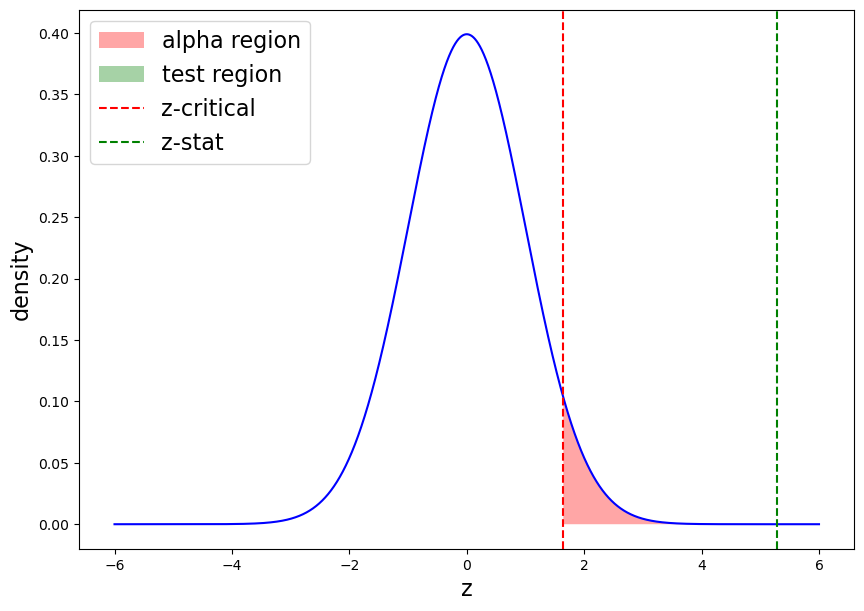

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# sample distribution plots
x_sample = np.arange(-6., 6., 0.001)
y_sample = stats.norm.pdf(x_sample, 0, 1)
ax.plot(x_sample, y_sample,
        color = "blue")

# region plot of alpha (region where H-0 is rejected)
# this region is red
x_alpha = np.arange(z_critical, 6., 0.001)
y_alpha = stats.norm.pdf(x_alpha)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red", 
                alpha = .35,
                label = "alpha region")


# plot the region of the sample we find
# this region is green
x_test = np.arange(z_stat, 6., 0.001)
y_test = stats.norm.pdf(x_test)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green", 
                alpha = .35,
                label = "test region")


# Plot vertical line alpha
ax.axvline(z_critical, 
           color = "red",
           linestyle = "--",
           label = "z-critical")

# Plot vertical line test
ax.axvline(z_stat, 
           color = "green",
           linestyle = "--",
           label = "z-stat")


# Styling plot
ax.set_xlabel("z", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=16)
plt.show()

- the area of the green region < the area of the red region (the region where $H_{0}$ is rejected)
- that is, the probability of getting $H_{0}$ from the sample is even smaller than the $\alpha$ limit we set.
- that statistically, we don't have enough evidence to accept $H_{0}$ (small p-value less than $\alpha$), so $H_{0}$ rejected

**Conclusion and Decision**

- p-value (6.061722707735026e-08) < 𝛼 (0.05) → Reject H0
- z statistics (5.2916) > z critical (1.644) → Reject H0


with significance level 5%, there is suffivient evidence that CTR New link such as in picture not text (treatment) more than existing link (control)

in other words

CTR New link, such as in picture not text will increase user interest in downloading the application.

#### Confidence interval of difference between treatment and control

In [49]:
from statsmodels.stats.proportion import confint_proportions_2indep

confidence_interval = confint_proportions_2indep(count1 = n_treatment_ctr, nobs1 = n_treatment,
                                                 count2 = n_control_ctr, nobs2 = n_control, 
                                                 compare='diff', alpha=0.05)
print(confidence_interval)

(0.011216025374711922, 0.02440743382202487)


Based on these results, we are 95% sure that the difference in the proportion of users who clicked on the new link (CTR) in the treatment (B) and control (A) groups lies between 0.011 and 0.088.

Or it can be said that the increase in users when downloading applications using new links such as in picture (not text) (treatment) increases by 0.011 to 0.024.

Recommendations for website of the grocery store chain :
- Based on the statistical test results, the results are **statistically significant**. P-value = 0.05 indicates that there is a 5% probability that the observed difference is due to chance or other factors unrelated to the variable being observed.
- But to make a decision whether to change the link to a button of the app store or not, must be **practically sigificant** such as :
1. Resources and costs required to implement the change. If the cost required for the change to the link to a button of the app store on the website is very high and not proportional to the impact on mobile app downloads, then the change may not be considered practically significant..
2. It is also necessary to consider the difference between performance before and after the change. If the change to the link to a button of the app store on the website can increase mobile app downloads by 1% or more, then the change may be considered practically significant. However, if the change only increases mobile app downloads by 0.1% or less, then the change may not be considered practically significant.
- Based on the above considerations, the change is considered practically significant.

Recommendation for the next experiment :

1. Download page variants: change the layout or content of the mobile app download page, such as adding images or positive reviews from other users.
2. App description: Change the app description on the website, such as highlighting the benefits or advantages of the app.
3. Changes to the overall appearance and content of the website: Changing the overall layout, design, and content of the website can affect the way users interact with the website.
4. Target audience: There may be certain groups of users who are more likely to download apps than others, so changing the look and content of the website to appeal more to certain target groups could be a recommendation for future experiments.